In [3]:
import pymongo
from pymongo import MongoClient

client = MongoClient('localhost',27017) 
db = client['smartshark_test']

In [4]:
db.collection_names()

[u'vcs_system',
 u'issue_system',
 u'code_entity_state',
 u'code_group_state',
 u'event',
 u'file',
 u'issue',
 u'project',
 u'commit',
 u'issue_comment',
 u'tag',
 u'hunk',
 u'file_action',
 u'plugin_schema',
 u'people',
 u'mailing_list',
 u'message',
 u'clone_instance']

In [20]:
people = db['people']

In [21]:
people.find_one()

{u'_id': ObjectId('5853f9f6bb982c643e11cc43'),
 u'email': u'zookeeper-user@hadoop.apache.org',
 u'name': u'zookeeper-user',
 u'username': u'zookeeper-user'}

In [5]:
commits = db['commit']

In [6]:
commits.count()

2371

In [7]:
commits.find_one()

{u'_id': ObjectId('5853eb373ee1b95d618826ef'),
 u'author_date': datetime.datetime(2012, 9, 21, 23, 4, 23),
 u'author_date_offset': 0,
 u'author_id': ObjectId('5853eb373ee1b95d618826f0'),
 u'branches': [u'refs/remotes/origin/branch-3.3'],
 u'committer_date': datetime.datetime(2012, 9, 21, 23, 4, 23),
 u'committer_date_offset': 0,
 u'committer_id': ObjectId('5853eb373ee1b95d618826f0'),
 u'message': u'ZOOKEEPER-1376. zkServer.sh does not correctly check for $SERVER_JVMFLAGS (Skye W-M via henryr)\n\ngit-svn-id: https://svn.apache.org/repos/asf/zookeeper/branches/branch-3.3@1388719 13f79535-47bb-0310-9956-ffa450edef68\n',
 u'parents': [u'e4f791598a33d683e24a828ae173a41ca7f8ab68'],
 u'revision_hash': u'314a55237b3e6134eaa12818a195abe73a99ee79',
 u'vcs_system_id': ObjectId('5853eb4aa737aab0c0c42518')}

In [8]:
commits.count()

2371

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(list(commits.find()) )

In [11]:
df.head()

,_id,author_date,author_date_offset,author_id,branches,committer_date,committer_date_offset,committer_id,message,parents,revision_hash,vcs_system_id
0,5853eb373ee1b95d618826ef,2012-09-21 23:04:23,0,5853eb373ee1b95d618826f0,[refs/remotes/origin/branch-3.3],2012-09-21 23:04:23,0,5853eb373ee1b95d618826f0,ZOOKEEPER-1376. zkServer.sh does not correctly...,[e4f791598a33d683e24a828ae173a41ca7f8ab68],314a55237b3e6134eaa12818a195abe73a99ee79,5853eb4aa737aab0c0c42518
1,5853eb373ee1b95d698826ef,2012-06-29 20:13:25,0,5853eb373ee1b95d698826f0,[refs/remotes/origin/branch-3.3],2012-06-29 20:13:25,0,5853eb373ee1b95d698826f0,ZOOKEEPER-1466. QuorumCnxManager.shutdown miss...,[5998f951a3174a4e52417dfd9be6b535f59a0308],3cd93fd89e151192f4dab92286537e2a3ab6506a,5853eb4aa737aab0c0c42518
2,5853eb373ee1b95d6a8826ef,2012-04-22 19:28:09,0,5853eb373ee1b95d6a8826f0,[refs/remotes/origin/branch-3.3],2012-04-22 19:28:09,0,5853eb373ee1b95d6a8826f0,ZOOKEEPER-1450. Backport of ZOOKEEPER-1294 f...,[91a26d5c6b63c67347fafbec0791a184ff288f91],0440d610b71dc7214e6a20a1543b626ae0df540e,5853eb4aa737aab0c0c42518
3,5853eb373ee1b95d668826ef,2012-07-29 05:33:09,0,5853eb373ee1b95d628826f0,[refs/remotes/origin/branch-3.3],2012-07-29 05:33:09,0,5853eb373ee1b95d628826f0,ZOOKEEPER-1493. C Client: zookeeper_process do...,[5c3f97de932129249753a78572be7b2b69acae00],01c66227ce67d90a85f964f05d2f3e86878b8ebf,5853eb4aa737aab0c0c42518
4,5853eb373ee1b95d6f8826ef,2012-05-10 01:46:25,0,5853eb373ee1b95d678826f0,[refs/remotes/origin/branch-3.3],2012-05-10 01:46:25,0,5853eb373ee1b95d678826f0,"ZOOKEEPER-1318. In Python binding, get_childre...",[54b5ed8f7b3d848f56ab47503fba65c977196156],368710032700e425d8cd77d6570cf94817a2d5d6,5853eb4aa737aab0c0c42518


In [12]:
master_commits = df.iloc[ [u'refs/remotes/origin/master' in df.branches.loc[i] for i in range(len(df.branches))] ]

In [13]:
import matplotlib
import datetime
%matplotlib notebook

# How many commits/month over Time?

In [12]:
df_tmp = df['author_id']
df_tmp.index = df['author_date']

In [13]:
df_tmp.head()

author_date
2012-09-21 23:04:23    5853eb373ee1b95d618826f0
2012-06-29 20:13:25    5853eb373ee1b95d698826f0
2012-04-22 19:28:09    5853eb373ee1b95d6a8826f0
2012-07-29 05:33:09    5853eb373ee1b95d628826f0
2012-05-10 01:46:25    5853eb373ee1b95d678826f0
Name: author_id, dtype: object

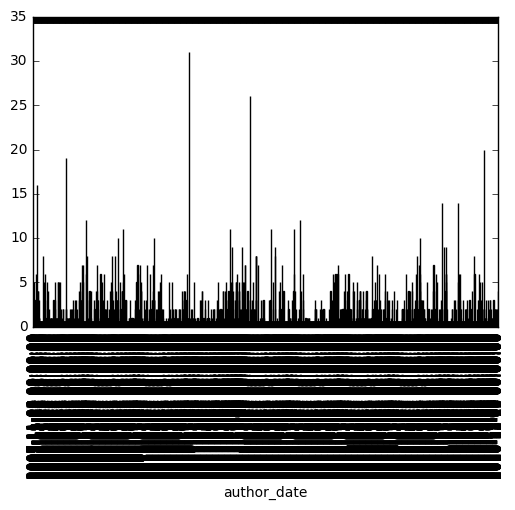

In [14]:
%matplotlib inline

df_tmp.groupby(pd.TimeGrouper('D') ).count().plot(kind='bar')

# Who was the most committed?

In [14]:
df_tmp = master_commits['author_date']
df_tmp.index = master_commits['author_id']

In [15]:
counts = df_tmp.groupby(df_tmp.index).count()

<IPython.core.display.Javascript object>


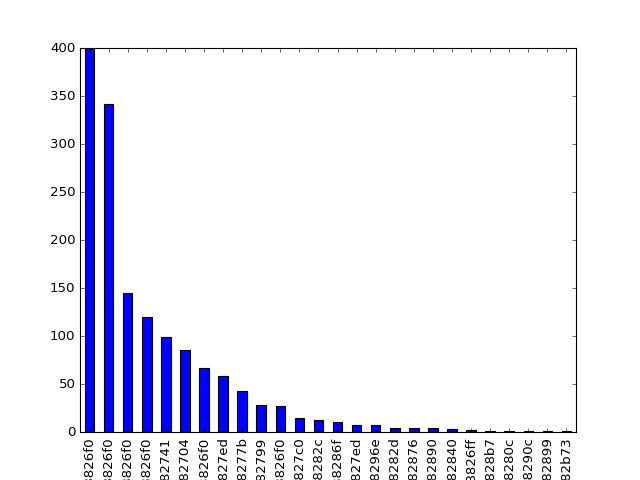

In [16]:
counts.sort_values(ascending=False).plot(kind='bar')

# This timeseries stuff from the CCC talk

In [17]:
from matplotlib import pyplot as plt
import numpy as np
from bson.objectid import ObjectId

<IPython.core.display.Javascript object>


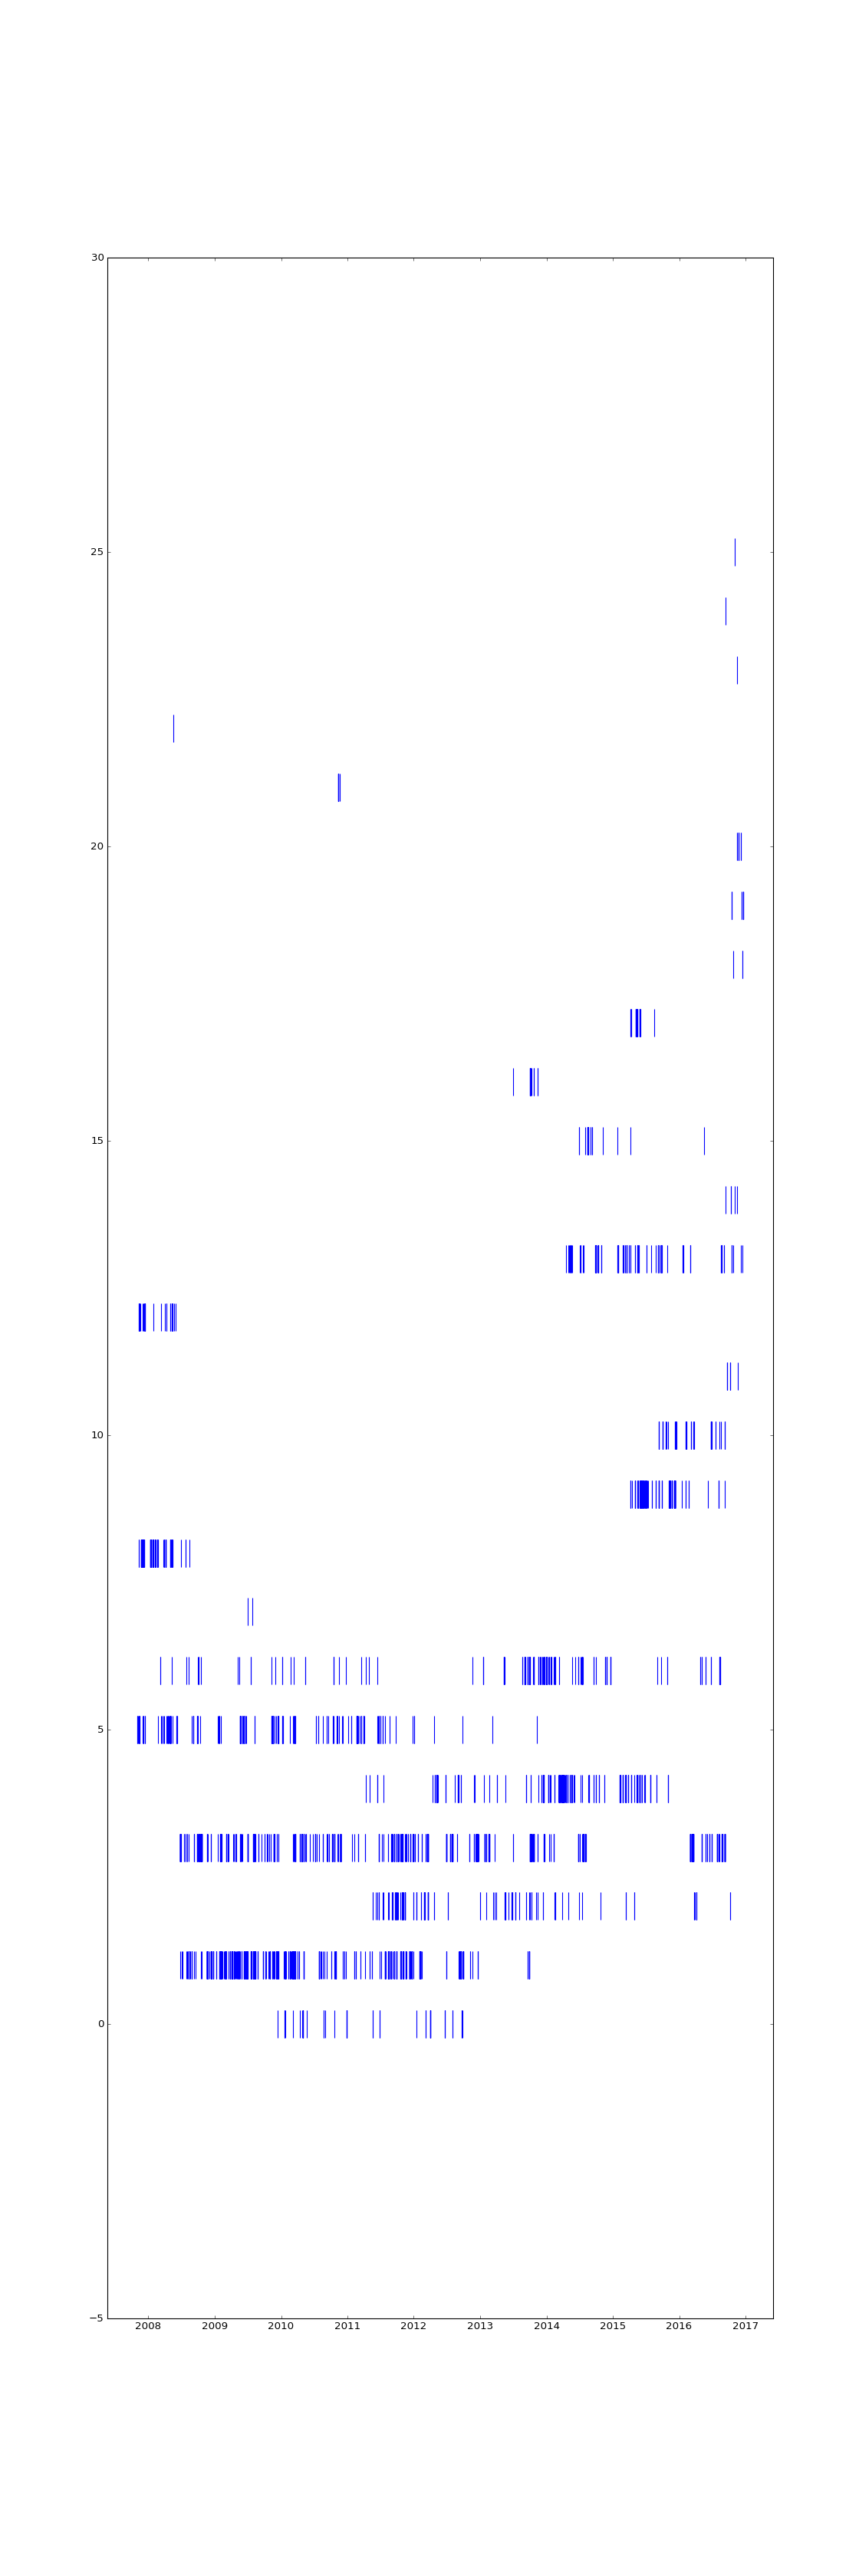

/home/marszal/.local/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
fig = plt.figure(figsize=(14,42))
ax = fig.add_subplot(111)
authors_id_str = [str(df.author_id.iloc[i]) for i in range(len(df.author_id))]
unique_authors = pd.unique(authors_id_str)
for i,author in enumerate(unique_authors[:100]):
    authors_commits = df.iloc[[str(df.author_id.iloc[j]) == str(author) for j in range(len(df.author_id))]]
    authors_commits['author_id']=i
    x = np.array(authors_commits.author_date)
    y = np.array(authors_commits.author_id)
    ax.scatter(x,y, marker='|', s=1000)
plt.savefig('frequency.png')

In [21]:
print(unique_authors)

['5853eb373ee1b95d618826f0' '5853eb373ee1b95d698826f0'
 '5853eb373ee1b95d6a8826f0' '5853eb373ee1b95d628826f0'
 '5853eb373ee1b95d678826f0' '5853eb373ee1b95d898826f0'
 '5853eb383ee1b95d68882704' '5853eb393ee1b95d968826ff'
 '5853eb3f3ee1b95d6d882741' '5853eb3f3ee1b95d6e8827ed'
 '5853eb403ee1b95d8d8827c0' '5853eb403ee1b95d79882840'
 '5853eb403ee1b95d9d882799' '5853eb403ee1b95d7588277b'
 '5853eb413ee1b95d8b88282d' '5853eb413ee1b95d7488282c'
 '5853eb403ee1b95d888827ed' '5853eb423ee1b95d8d88286f'
 '5853eb423ee1b95d9f88280c' '5853eb443ee1b95d98882890'
 '5853eb443ee1b95d65882876' '5853eb463ee1b95d8d88296e'
 '5853eb443ee1b95d7988290c' '5853eb443ee1b95d98882899'
 '5853eb423ee1b95d878828b7' '5853eb483ee1b95d8c882b73']
